<a href="https://colab.research.google.com/github/anactedesco/churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breve análise de churn - Ana Tedesco
18 de fevereiro de 2025

## A proposta aqui é gerar insights sobre churn de clientes de uma empresa aleatória, com dados aleatórios, e escrever resumidamente algumas conclusões sobre o assunto.

In [1]:
#chamando as bibliotecas que vamos utilizar para a análise
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [3]:
#definindo os dados
data = {
    'mes_entrada': ['2021-12']*12 + ['2022-01']*11 + ['2022-02']*10 + ['2022-03']*9 + ['2022-04']*8 + ['2022-05']*7 + ['2022-06']*6 + ['2022-07']*5 + ['2022-08']*4 + ['2022-09']*3 + ['2022-10']*2 + ['2022-11']*1,
    'meses_na_base': list(range(12)) + list(range(11)) + list(range(10)) + list(range(9)) + list(range(8)) + list(range(7)) + list(range(6)) + list(range(5)) + list(range(4)) + list(range(3)) + list(range(2)) + list(range(1)),
    'clientes': [59, 50, 51, 47, 48, 47, 44, 44, 36, 38, 35, 32, 33, 28, 23, 21, 22, 21, 20, 17, 17, 15, 15, 47, 40, 33, 30, 29, 27, 26, 23, 21, 17, 71, 57, 51, 47, 43, 42, 42, 39, 35, 55, 42, 41, 38, 34, 34, 32, 27, 81, 66, 52, 45, 40, 34, 32, 251, 180, 152, 143, 135, 118, 158, 114, 93, 73, 59, 180, 106, 87, 69, 167, 91, 71, 156, 81, 309],
    'receita': [110076.57, 134665.21, 150897.90, 196200.31, 192359.71, 183856.81, 147169.34, 134344.70, 141131.00, 147393.16, 244643.35, 279140.90, 33829.68, 49472.26, 55528.58, 60767.72, 57674.15, 40401.87, 41011.23, 40504.97, 46337.76, 60620.20, 60011.00, 39675.94, 66206.49, 68917.71, 63505.29, 69473.02, 84746.93, 41982.94, 37203.90, 50470.47, 46756.96, 71164.60, 216371.16, 163968.56, 149786.34, 158558.15, 124162.25, 141211.78, 145157.89, 124267.12, 62199.69, 109714.52, 95603.76, 85334.68, 71275.19, 74469.72, 111854.10, 123668.28, 110630.99, 139413.29, 74198.03, 56831.65, 51232.18, 57674.69, 58765.45, 516309.29, 488002.76, 399530.15, 337075.34, 367100.43, 315088.37, 184466.53, 213557.78, 142329.53, 111710.57, 105987.03, 226020.74, 213632.60, 179087.66, 179204.88, 189095.47, 246486.56, 201803.56, 220643.43, 355381.76, 154341.05],
    'orders': [1440, 1852, 2061, 2214, 1960, 2223, 1773, 1600, 1643, 1530, 1056, 801, 606, 936, 912, 801, 858, 725, 579, 624, 635, 639, 473, 630, 1085, 948, 912, 882, 806, 786, 698, 534, 358, 954, 1764, 1762, 1546, 1429, 1380, 1357, 1263, 957, 880, 1708, 1535, 1368, 1202, 1137, 979, 806, 1341, 1875, 1357, 1211, 1038, 939, 741, 6055, 5776, 5175, 4597, 4629, 3625, 2354, 2952, 2043, 1643, 1240, 2507, 2082, 1879, 1364, 1931, 1978, 1384, 2523, 1879, 2475]
}

In [4]:
#vamos criar um dataframe baseado nos nossos dados
df = pd.DataFrame(data)

In [5]:
#vamos conferir a estrutura do nosso df
df

,mes_entrada,meses_na_base,clientes,receita,orders
0,2021-12,0,59,110076.57,1440
1,2021-12,1,50,134665.21,1852
2,2021-12,2,51,150897.90,2061
3,2021-12,3,47,196200.31,2214
4,2021-12,4,48,192359.71,1960
...,...,...,...,...,...
73,2022-09,1,91,246486.56,1978
74,2022-09,2,71,201803.56,1384
75,2022-10,0,156,220643.43,2523
76,2022-10,1,81,355381.76,1879


In [6]:
#criando a coluna de cohort (mes_entrada)
df['cohort'] = df['mes_entrada']

In [7]:
#vamos então calcular a retenção de clientes
cohorts = df.groupby(['cohort', 'meses_na_base']).agg({'clientes': 'sum'}).reset_index()
cohorts = cohorts.pivot(index='cohort', columns='meses_na_base', values='clientes')

In [8]:
#agora calculando a retenção percentual
cohort_size = cohorts.iloc[:, 0]
retention = cohorts.divide(cohort_size, axis=0)

In [9]:
#definindo a paleta de cores
palette = ["#e3fa8a", "#74946c", "#6d8c50", "#86a464", "#2c5452"]

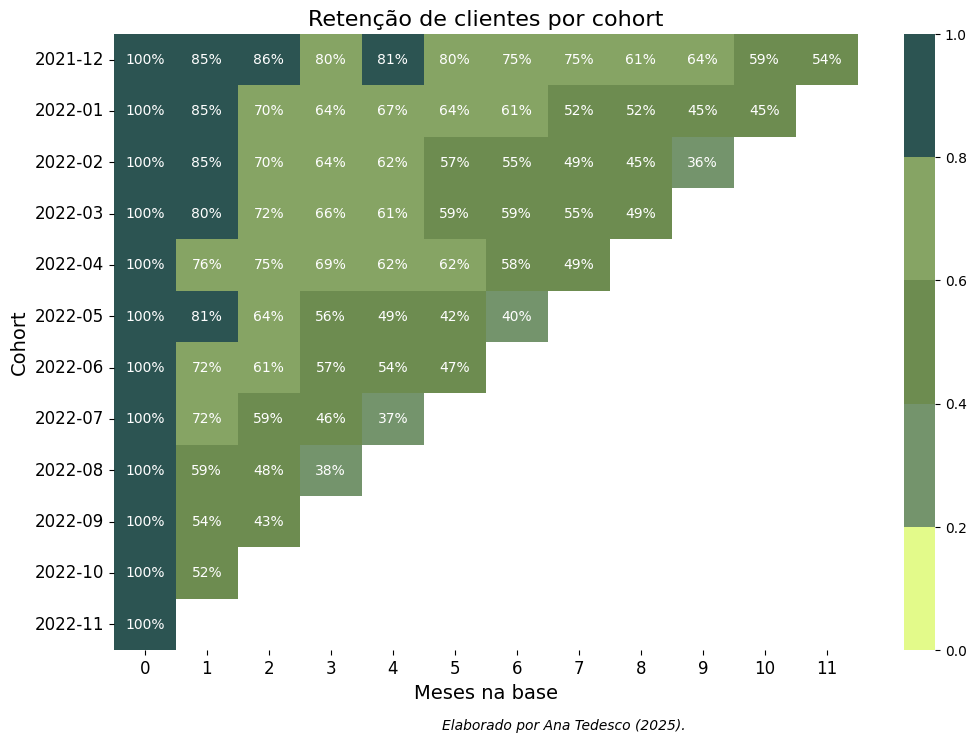

In [13]:
#por fim, vamos plotar o gráfico de cohorts
plt.figure(figsize=(12, 8))
plt.title('Retenção de clientes por cohort', fontsize=16)
sns.heatmap(retention, annot=True, fmt='.0%', cmap=palette, vmin=0.0, vmax=1.0)
plt.ylabel('Cohort', fontsize=14)
plt.xlabel('Meses na base', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, 0.01, "Elaborado por Ana Tedesco (2025).", ha="center", fontsize=10, style="italic")
plt.show()

**Principais insights sobre as cohorts:**

De modo geral, o gráfico de cohorts mostra que a retenção de clientes diminui ao longo do tempo (eixo X), com uma queda mais acentuada nos primeiros meses. As cohorts mais antigas têm uma retenção melhor, enquanto as cohorts mais recentes mostram uma queda mais veloz. No entanto, este fator também está relacionado com os dados, uma vez que as cohorts mais recentes (como 2022-09, 2022-10 e 2022-11) possuem menos meses de dados disponíveis, embora já indiquem tendência de queda na retenção.

Isso sugere que:

* É importante focar em estratégias de engajamento e retenção nos primeiros meses após o cadastro, pois é quando a maior parte da perda de clientes ocorre;

* As cohorts mais recentes devem ser monitoradas de perto para entender se a queda na retenção é uma tendência ou um problema pontual;

* Para reverter a tendência, pode ser interessante revisar as estratégias de retenção e engajamento dos clientes para melhorar a fidelidade dos mesmos, especialmente para as cohorts mais recentes.

### **Apêndice**

Observando os dados e refletindo sobre eles, resolvi complementar a análise com um gráfico de regressão linear que mostra a relação entre *meses na base* (eixo X) e *número de clientes* (eixo Y). Esta análise é interessante pois complementa a análise do gráfico de cohort.

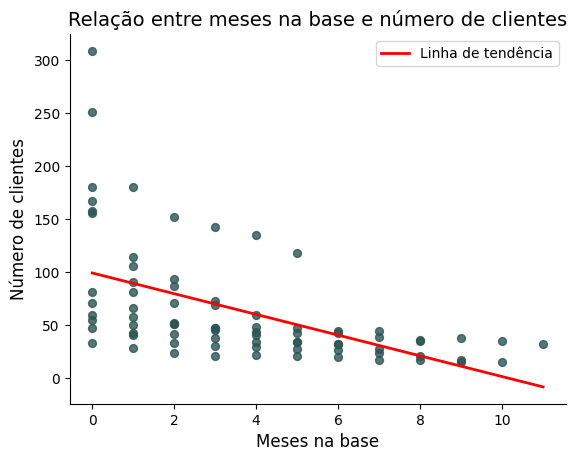

In [15]:
import numpy as np

#criando um gráfico de dispersão
ax = df.plot(kind='scatter', x='meses_na_base', y='clientes', s=32, alpha=.8, color='#2c5452')

#fazendo o ajuste linear (regressão linear) e gerando os pontos para a linha de tendência
coef = np.polyfit(df['meses_na_base'], df['clientes'], 1)
poly1d_fn = np.poly1d(coef)
x_range = np.linspace(df['meses_na_base'].min(), df['meses_na_base'].max(), 100)

#juntando e plotando os dados
plt.plot(x_range, poly1d_fn(x_range), color='red', linewidth=2, label='Linha de tendência')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Relação entre meses na base e número de clientes', fontsize=14)
plt.xlabel('Meses na base', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.legend()
plt.show()

Na análise do gráfico de dispersão, vemos que a linha de tendência - obtida por meio de uma regressão linear simples - possui inclinação negativa, indicando que, conforme aumentam os meses desde a entrada do cliente, o número de clientes tende a diminuir. Em outras palavras, há um padrão de queda no total de clientes ativos ao longo do tempo, algo que normalmente é associado a *churn* ou rotatividade de clientes. Contudo, a dispersão dos pontos revela que, embora a tendência geral seja de redução, há certa variação entre os meses, o que pode ser influenciado por ações de retenção, sazonalidades ou outras dinâmicas específicas do negócio - valeriam outras análises para aprofundar.